In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier


import re
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')


print(df.head())

Saving test.csv to test (1).csv
       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan          38928346         652860.0   
1          noon       21-30      Albania           2877797          27400.0   
2         night       31-45      Algeria          43851044        2381740.0   
3       morning       46-60      Andorra             77265            470.0   
4          noon       60-70       Angola          32866272        1246700.0   

   Density (P/Km²)  
0  

In [ ]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   int64  
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 248.6+ KB


In [ ]:
df.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [ ]:
df.shape

(3534, 9)

In [ ]:
df['sentiment'].value_counts()

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='Count'>

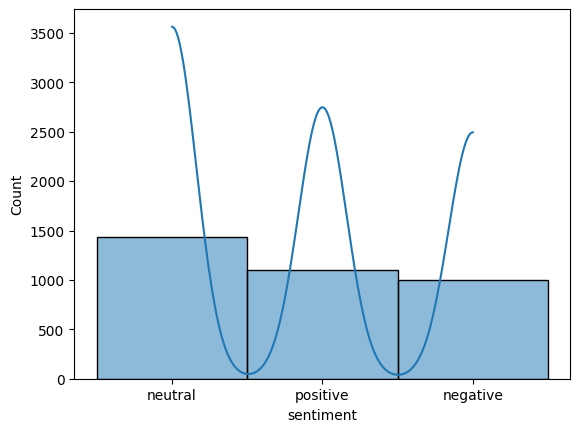

In [ ]:
sns.histplot(df['sentiment'],kde=True)

In [ ]:
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment'] = df['sentiment'].map(sentiment_map)
print(df.head())

       textID                                               text  sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh          0   
1  96d74cb729   Shanghai is also really exciting (precisely -...          1   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...         -1   
3  01082688c6                                        happy bday!          1   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!          1   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan          38928346         652860.0   
1          noon       21-30      Albania           2877797          27400.0   
2         night       31-45      Algeria          43851044        2381740.0   
3       morning       46-60      Andorra             77265            470.0   
4          noon       60-70       Angola          32866272        1246700.0   

   Density (P/Km²)  
0               60  
1       

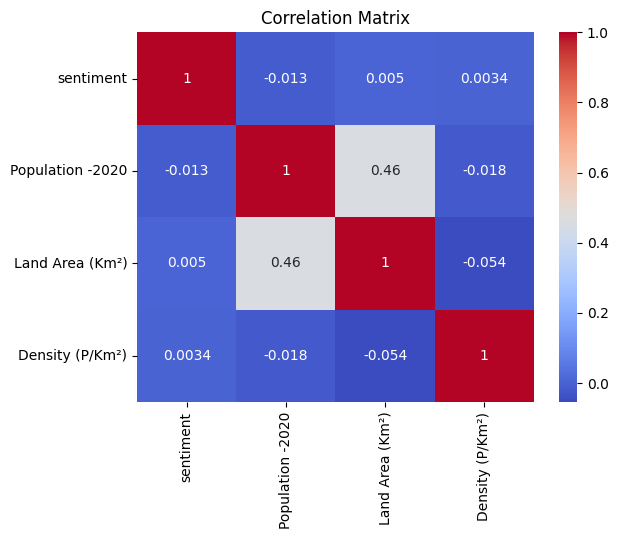

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

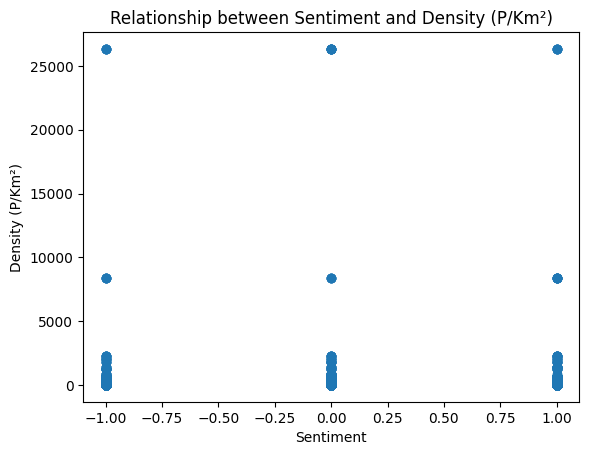

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['sentiment'], df['Density (P/Km²)'])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Density (P/Km²)')
ax.set_title('Relationship between Sentiment and Density (P/Km²)')
plt.show()

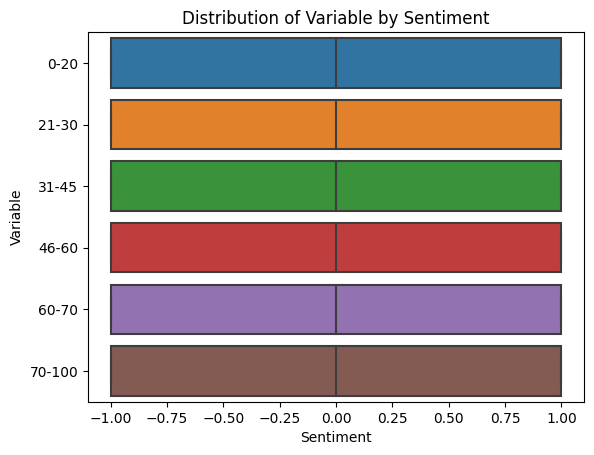

In [ ]:
sns.boxplot(x='sentiment', y='Age of User', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Variable')
plt.title('Distribution of Variable by Sentiment')
plt.show()

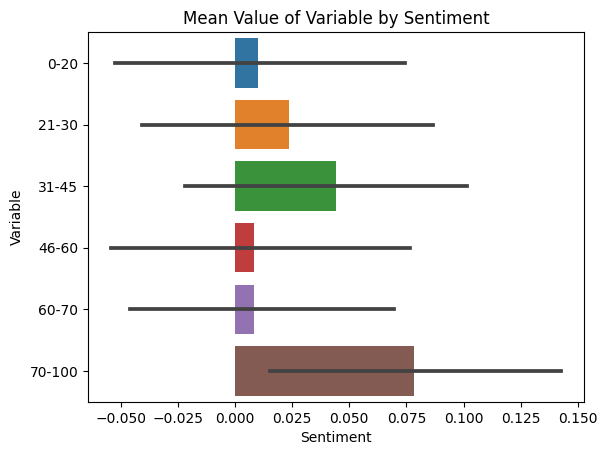

In [ ]:
sns.barplot(x='sentiment', y='Age of User', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Variable')
plt.title('Mean Value of Variable by Sentiment')
plt.show()

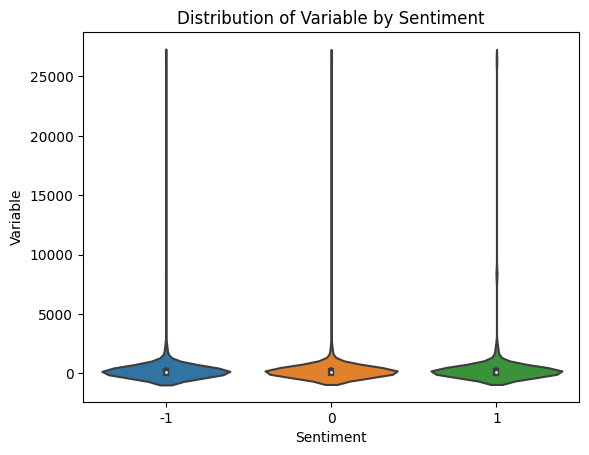

In [ ]:
sns.violinplot(x='sentiment', y='Density (P/Km²)', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Variable')
plt.title('Distribution of Variable by Sentiment')
plt.show()

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(df[['text', 'Density (P/Km²)']], df['sentiment'], test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_test_text = vectorizer.transform(X_test['text'])


X_train = pd.concat([X_train['Density (P/Km²)'].reset_index(drop=True), pd.DataFrame(X_train_text.toarray())], axis=1)
X_test = pd.concat([X_test['Density (P/Km²)'].reset_index(drop=True), pd.DataFrame(X_test_text.toarray())], axis=1)

print('Entered')
from sklearn.model_selection import cross_val_score, cross_validate


nb = MultinomialNB(alpha=.3)
rf = RandomForestClassifier(n_estimators=100, max_depth=80)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

models = [nb, rf]

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

for model in models:
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    print('Model:', model.__class__.__name__)
    print('Accuracy:', scores['test_accuracy'].mean())
    print('Precision:', scores['test_precision_weighted'].mean())
    print('Recall:', scores['test_recall_weighted'].mean())
    print('F1-Score:', scores['test_f1_weighted'].mean())
    print('\n')


Entered
Model: MultinomialNB
Accuracy: 0.5429754655038469
Precision: 0.5686857554523019
Recall: 0.5429754655038469
F1-Score: 0.5316731329002822


Model: RandomForestClassifier
Accuracy: 0.6087599929829837
Precision: 0.6563113431209867
Recall: 0.6087599929829837
F1-Score: 0.5957779794351267




In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [150, 200, 180],
    'max_depth': [80, 100, 150]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 100, 'n_estimators': 180}
Best accuracy: 0.6207904167606445


In [ ]:

nb = MultinomialNB(alpha=.3)
rf = RandomForestClassifier(n_estimators=100, max_depth=80)
gb = GradientBoostingClassifier(n_estimators=100, max_depth=10)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

models = [nb, rf, gb]


scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']


for model in models:
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    print('Model:', model.__class__.__name__)
    print('Accuracy:', scores['test_accuracy'].mean())
    print('Precision:', scores['test_precision_weighted'].mean())
    print('Recall:', scores['test_recall_weighted'].mean())
    print('F1-Score:', scores['test_f1_weighted'].mean())
    print('\n')


Model: MultinomialNB
Accuracy: 0.5429754655038469
Precision: 0.5686857554523019
Recall: 0.5429754655038469
F1-Score: 0.5316731329002822


Model: RandomForestClassifier
Accuracy: 0.6101771796606771
Precision: 0.6580928029507555
Recall: 0.6101771796606771
F1-Score: 0.5966131374539171


Model: GradientBoostingClassifier
Accuracy: 0.6293085732902288
Precision: 0.6528234417976098
Recall: 0.6293085732902288
F1-Score: 0.6251427568993292




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer






X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn import svm


param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}


svm_clf = svm.SVC()


grid_search = GridSearchCV(svm_clf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best parameters: ", grid_search.best_params_)


best_svm_clf = svm.SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
best_svm_clf.fit(X_train, y_train)


accuracy = best_svm_clf.score(X_test, y_test)
print('Accuracy:', accuracy)




Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.6548797736916548


In [ ]:
new_text = ['This is a bad product!',
           'I am very happy with the service.']
new_text = vectorizer.transform(new_text)
predictions = best_svm_clf.predict(new_text)
print('Predictions:', predictions)

Predictions: [-1  1]


Update for 29/5/2023

Work with NLTK

In [ ]:
# import required libraries
import pandas as pd
import spacy
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
import nltk
nltk.download('vader_lexicon')
import re

from nltk.sentiment import SentimentIntensityAnalyzer

uploaded = files.upload()

data = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')


print(data.head())

# feature engineering
nlp = spacy.load('en_core_web_sm')
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,3), tokenizer=lambda text: [token.lemma_ for token in nlp(text) if not token.is_punct and not token.is_space])
text_features = vectorizer.fit_transform(data['text'])


# Count positive and negative words
sid = SentimentIntensityAnalyzer()
positive_word_counts = []
negative_word_counts = []
for text in data['text']:
    ss = sid.polarity_scores(text)
    positive_word_counts.append(ss['pos'])
    negative_word_counts.append(ss['neg'])
positive_word_counts = pd.DataFrame(positive_word_counts, columns=['positive_word_count'])
negative_word_counts = pd.DataFrame(negative_word_counts, columns=['negative_word_count'])

# Count tweet lengths
tweet_lengths = []
for text in data['text']:
    length = len(text)
    tweet_lengths.append(length)
tweet_lengths = pd.DataFrame(tweet_lengths, columns=['tweet_length'])


X = hstack((text_features, positive_word_counts, negative_word_counts, tweet_lengths))

# target variable
y = data['sentiment']


from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
nb_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
rf_params = {'n_estimators': [50, 100, 200, 300],
             'max_depth': [100, 150, 250]}

gb_params = {'n_estimators': [50, 100, 200, 300],
             'max_depth': [2, 5, 10],
             'learning_rate': [0.1, 0.001, 1]}
lr_params = {'C': [0.1, 1, 10, 100, 1000]}
svm_params = {'C': [10],
              'kernel': ['linear']}

# Define the classifiers
nb = MultinomialNB()
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression()
svm = SVC(random_state=42)

# Define the GridSearchCV objects
nb_grid = GridSearchCV(nb, nb_params, scoring='accuracy', cv=5)
rf_grid = GridSearchCV(rf, rf_params, scoring='accuracy', cv=5)
gb_grid = GridSearchCV(gb, gb_params, scoring='accuracy', cv=5)
lr_grid = GridSearchCV(lr, lr_params, scoring='accuracy', cv=5)
svm_grid = GridSearchCV(svm, svm_params, scoring='accuracy', cv=5)

# Fit the GridSearchCV objects to the data
nb_grid.fit(X, y)
rf_grid.fit(X, y)
gb_grid.fit(X, y)
lr_grid.fit(X, y)


# Print the best hyperparameters and their corresponding scores for each classifier
print('Multinomial Naive Bayes:')
print('Best Parameters:', nb_grid.best_params_)
print('Best Score:', nb_grid.best_score_)
print('')

print('Random Forest:')
print('Best Parameters:', rf_grid.best_params_)
print('Best Score:', rf_grid.best_score_)
print('')

print('Gradient Boosting:')
print('Best Parameters:', gb_grid.best_params_)
print('Best Score:', gb_grid.best_score_)
print('')

print('Logistic Regression:')
print('Best Parameters:', lr_grid.best_params_)
print('Best Score:', lr_grid.best_score_)

svm_grid.fit(X, y)
print('SVM:')
print('Best Parameters:', svm_grid.best_params_)
print('Best Score:', svm_grid.best_score_)
print('')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saving test.csv to test (7).csv
       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan          38928346         652860.0   
1          noon       21-30      Albania           2877797          27400.0   
2         night       31-45      Algeria          43851044        2381740.0   
3       morning       46-60      Andorra             77265            470.0   
4          noon       60-70       Angola          32866272        1246700.0   

   Density (P/Km²)  
0  

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

Multinomial Naive Bayes:
Best Parameters: {'alpha': 1}
Best Score: 0.6443160463355116

Random Forest:
Best Parameters: {'max_depth': 150, 'n_estimators': 300}
Best Score: 0.7006302815631624

Gradient Boosting:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best Score: 0.681948623838507

Logistic Regression:
Best Parameters: {'C': 1}
Best Score: 0.6893116588065119
SVM:
Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Score: 0.6431812991092716



NLP

In [ ]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00


In [ ]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# Load and preprocess the data
from google.colab import files

uploaded = files.upload()

data = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')


print(data.head())
text_data = data['text'].tolist()
labels = data['sentiment'].tolist()





Saving test.csv to test.csv
       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan          38928346         652860.0   
1          noon       21-30      Albania           2877797          27400.0   
2         night       31-45      Algeria          43851044        2381740.0   
3       morning       46-60      Andorra             77265            470.0   
4          noon       60-70       Angola          32866272        1246700.0   

   Density (P/Km²)  
0      

In [ ]:
# Convert string labels to numerical values
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
labels = [label_map[label] for label in labels]

# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(text_data, labels, test_size=0.2, random_state=42)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenize the text
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

# Convert the tokenized inputs into PyTorch tensors
train_inputs = torch.tensor(train_encodings['input_ids'])
train_masks = torch.tensor(train_encodings['attention_mask'])
train_labels = torch.tensor(train_labels)

test_inputs = torch.tensor(test_encodings['input_ids'])
test_masks = torch.tensor(test_encodings['attention_mask'])
test_labels = torch.tensor(test_labels)

# Create PyTorch datasets
train_dataset = torch.utils.data.TensorDataset(train_inputs, train_masks, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_inputs, test_masks, test_labels)

# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Create a DataLoader for efficient batch processing
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

# Set up the optimizer and training parameters
optimizer = AdamW(model.parameters(), lr=1e-5)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


model.train()
for epoch in range(10):
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1}: Average Loss = {total_loss / len(train_loader):.4f}')


model.eval()
correct_predictions = 0
total_predictions = 0
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels = torch.argmax(logits, dim=1)
        correct_predictions += (predicted_labels == labels).sum().item()
        total_predictions += labels.size(0)

accuracy = correct_predictions / total_predictions


print(f'Test Accuracy: {accuracy * 100:.2f}%')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch 1: Average Loss = 0.9594
Epoch 2: Average Loss = 0.6302
Epoch 3: Average Loss = 0.4793
Epoch 4: Average Loss = 0.3473
Epoch 5: Average Loss = 0.2400
Epoch 6: Average Loss = 0.1574
Epoch 7: Average Loss = 0.1133
Epoch 8: Average Loss = 0.0886
Epoch 9: Average Loss = 0.0724
Epoch 10: Average Loss = 0.0615
Test Accuracy: 77.65%
